<a href="https://colab.research.google.com/github/Vishwaak/Time-for-Machine/blob/master/Cloth_fashion_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets , transforms
import torch.nn.functional as F



In [2]:
# importing th data


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 14884222.41it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 102087.64it/s]           
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4357924.17it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 32059.83it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


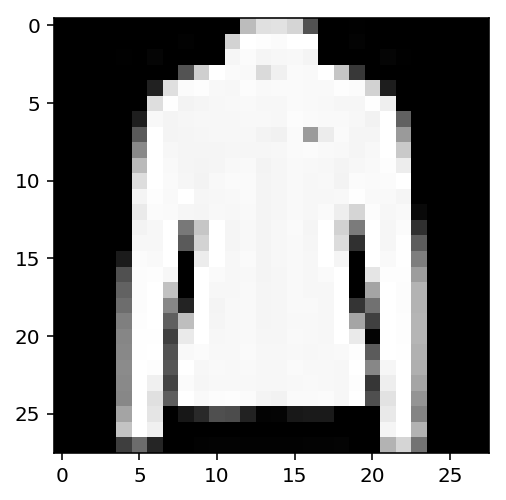

In [3]:
image, label = next(iter(trainloader))
plt.imshow(image[2,:].numpy().squeeze() , cmap = 'Greys_r');

In [4]:
print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
import torch.nn as nn

In [0]:
model = nn.Sequential(nn.Linear(784 , 128),
                      nn.ReLU(),
                      nn.Linear(128 , 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim = 1)
                     
                     )
critc = nn.NLLLoss()
image = image.view(image.shape[0] , -1)

logitics = model(image)

loss = critc(logitics , label)

In [7]:
print(loss)

tensor(2.3386, grad_fn=<NllLossBackward>)


In [8]:
print(model[0].weight.grad)
loss.backward()
print(model[0].weight.grad)

None
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.9406e-03, -1.9406e-03, -1.9406e-03,  ..., -1.9406e-03,
         -1.9406e-03, -1.9406e-03],
        [-6.4096e-03, -6.4096e-03, -6.4096e-03,  ..., -6.7241e-03,
         -7.0276e-03, -6.4096e-03],
        ...,
        [-5.2129e-03, -5.2129e-03, -5.2129e-03,  ..., -5.2117e-03,
         -5.2129e-03, -5.2129e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-5.4081e-04, -5.4081e-04, -5.4081e-04,  ..., -5.0096e-05,
         -1.8325e-04, -5.4081e-04]])


In [0]:
from torch import optim



In [10]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = critc(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0248, -0.0286,  0.0113,  ..., -0.0159, -0.0100,  0.0002],
        [ 0.0346,  0.0206, -0.0277,  ...,  0.0132,  0.0068,  0.0338],
        [-0.0156,  0.0005, -0.0302,  ..., -0.0132,  0.0242, -0.0157],
        ...,
        [-0.0172,  0.0186,  0.0161,  ...,  0.0011, -0.0193, -0.0089],
        [ 0.0187, -0.0225,  0.0198,  ..., -0.0150, -0.0300,  0.0071],
        [-0.0208, -0.0172,  0.0103,  ...,  0.0009,  0.0068, -0.0313]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0056, -0.0056, -0.0056,  ..., -0.0056, -0.0056, -0.0056],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0015, -0.0012, -0.0012],
        ...,
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0008,  0.0007,  0.0007]])


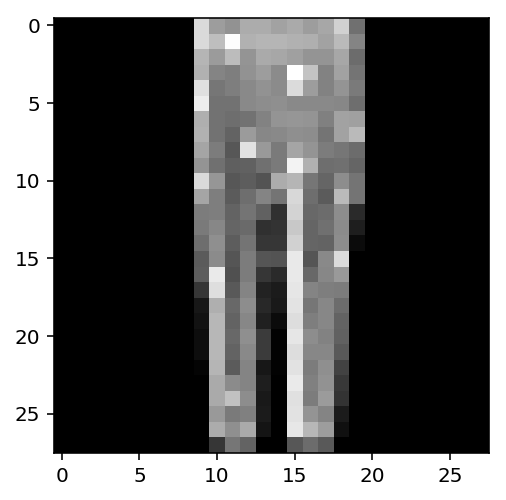

In [11]:
image, label = next(iter(trainloader))
plt.imshow(image[2,:].numpy().squeeze() , cmap = 'Greys_r');

In [12]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.log_softmax(dim=1))

criterion = nn.NLLLoss()
optimizier = optim.SGD(model.parameters() , lr = 0.01)
epoches = 5

for e in range(epoches):
  running_loss = 0
  for image , label in trainloader:
    image = image.view(image.shape[0] , -1)
    output = model.forward(image)
    loss = criterion(output , label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
     print(f"Training loss: {running_loss/len(trainloader)}")

AttributeError: ignored

In [0]:
import torch.nn.functional as F

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
dataiter = iter(testloader)

images , labels = dataiter.next()
img = images[1]
img = img.view(img.shape[0] , -1)
ps = torch.exp(model(img))

view_classify(img , ps , version='Fashion')

NameError: ignored

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
   

In [0]:
model = Classifier()

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
images , labels = next(iter(trainloader))

In [19]:
epoches = 5

for e in range(epoches):
  running_loss = 0
  for images , labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps , labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")
  

Training loss: 0.39521421527049183
Training loss: 0.36209806661679544
Training loss: 0.34517337073649423
Training loss: 0.331672255243701
Training loss: 0.32178110368788115


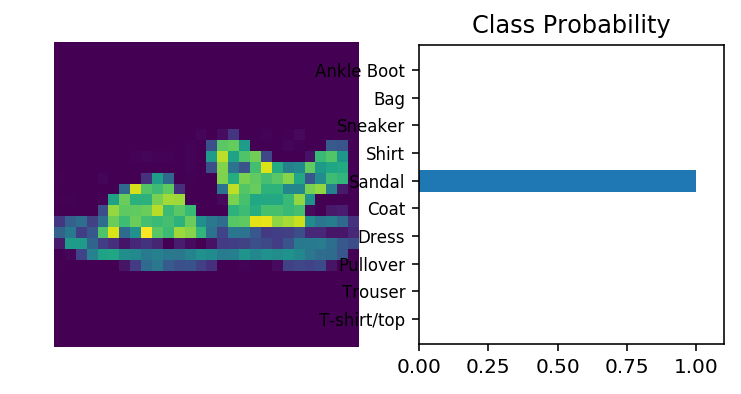

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(testloader)
images , labels = dataiter.next()

img = images[1]
img = img.view(img.shape[0] , -1)

ps = torch.exp(model(img))

view_classify(img , ps , version='Fashion')